911 Calls Capstone Project

In [40]:
import numpy as np
import pandas as pd

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [42]:
df = pd.read_csv("911.csv")

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
lat          663522 non-null float64
lng          663522 non-null float64
desc         663522 non-null object
zip          583323 non-null float64
title        663522 non-null object
timeStamp    663522 non-null object
twp          663229 non-null object
addr         663522 non-null object
e            663522 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [44]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [45]:
df['zip'].value_counts().head(5)

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

In [46]:
df['twp'].value_counts().head(5)

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

In [47]:
len(df['title'].unique())

148

In [48]:
df['Reason'] = df['title'].apply(lambda x:x.split(':')[0])

In [49]:
df['Reason']

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
5             EMS
6             EMS
7             EMS
8             EMS
9         Traffic
10        Traffic
11        Traffic
12        Traffic
13        Traffic
14        Traffic
15        Traffic
16            EMS
17            EMS
18            EMS
19        Traffic
20        Traffic
21        Traffic
22           Fire
23        Traffic
24        Traffic
25            EMS
26            EMS
27           Fire
28        Traffic
29        Traffic
           ...   
663492        EMS
663493    Traffic
663494        EMS
663495       Fire
663496        EMS
663497        EMS
663498        EMS
663499        EMS
663500    Traffic
663501       Fire
663502        EMS
663503        EMS
663504    Traffic
663505        EMS
663506        EMS
663507    Traffic
663508        EMS
663509        EMS
663510       Fire
663511        EMS
663512        EMS
663513    Traffic
663514    Traffic
663515    Traffic
663516    

In [50]:
df['Reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

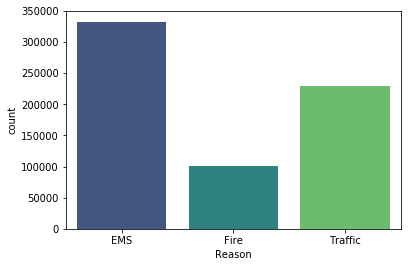

In [51]:
sns.countplot(x='Reason',data=df,palette='viridis')

In [52]:
type(df['timeStamp'][0])

str

In [53]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [54]:
type(df['timeStamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [55]:
time = df['timeStamp'].iloc[0]
time.hour

17

In [56]:
time

Timestamp('2015-12-10 17:10:52')

In [57]:
time.year

2015

In [58]:
df['Hour'] = df['timeStamp'].apply(lambda time:time.hour)

In [59]:
df['Hour']

0         17
1         17
2         14
3         16
4         16
5         15
6         16
7         16
8         16
9         17
10        17
11        16
12        17
13        17
14        17
15        17
16        17
17        17
18        17
19        17
20        17
21        17
22        17
23        18
24        17
25        18
26        18
27        18
28        18
29        18
          ..
663492    14
663493    14
663494    14
663495    14
663496    15
663497    15
663498    15
663499    15
663500    15
663501    15
663502    15
663503    15
663504    15
663505    15
663506    15
663507    15
663508    15
663509    15
663510    15
663511    15
663512    15
663513    15
663514    15
663515    15
663516    15
663517    15
663518    15
663519    15
663520    15
663521    15
Name: Hour, Length: 663522, dtype: int64

In [60]:
df['Month'] = df['timeStamp'].apply(lambda time:time.month)
df['DayOfWeek'] = df['timeStamp'].apply(lambda time:time.dayofweek)

In [61]:
df['DayOfWeek']

0         3
1         3
2         3
3         3
4         3
5         3
6         3
7         3
8         3
9         3
10        3
11        3
12        3
13        3
14        3
15        3
16        3
17        3
18        3
19        3
20        3
21        3
22        3
23        3
24        3
25        3
26        3
27        3
28        3
29        3
         ..
663492    2
663493    2
663494    2
663495    2
663496    2
663497    2
663498    2
663499    2
663500    2
663501    2
663502    2
663503    2
663504    2
663505    2
663506    2
663507    2
663508    2
663509    2
663510    2
663511    2
663512    2
663513    2
663514    2
663515    2
663516    2
663517    2
663518    2
663519    2
663520    2
663521    2
Name: DayOfWeek, Length: 663522, dtype: int64

In [62]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [63]:
df['DayOfWeek'] = df['DayOfWeek'].map(dmap)

In [64]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,DayOfWeek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu


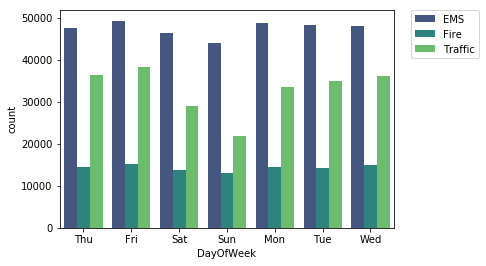

In [65]:
sns.countplot(x='DayOfWeek',data=df,palette='viridis',hue='Reason')
# to relocate the legend

plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad = 0)

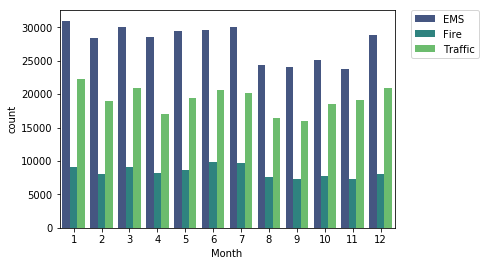

In [66]:
sns.countplot(x='Month',data=df,palette='viridis',hue='Reason')
# to relocate the legend

plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad = 0)

In [67]:
byMonth = df.groupby('Month').count()

In [68]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,DayOfWeek
Month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509


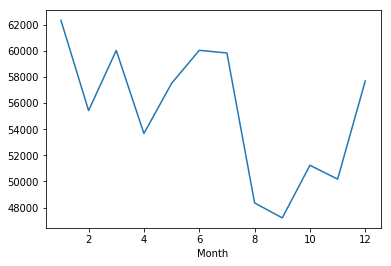

In [69]:
byMonth['lat'].plot()

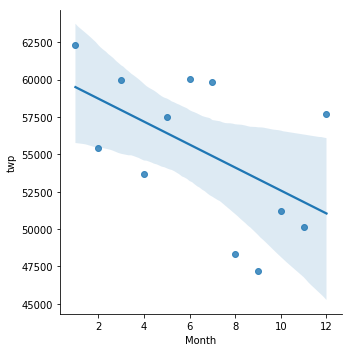

In [70]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

In [71]:
t=df['timeStamp'].iloc[0]

In [72]:
t

Timestamp('2015-12-10 17:10:52')

In [74]:
t.date()

datetime.date(2015, 12, 10)

In [75]:
df['Date'] = df['timeStamp'].apply(lambda t:t.date())

In [77]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,DayOfWeek,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu,2015-12-10


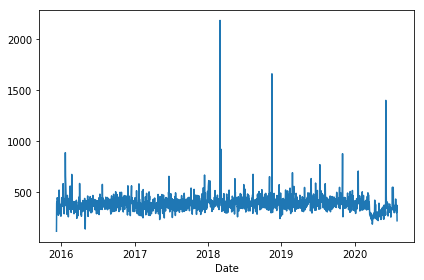

In [79]:
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

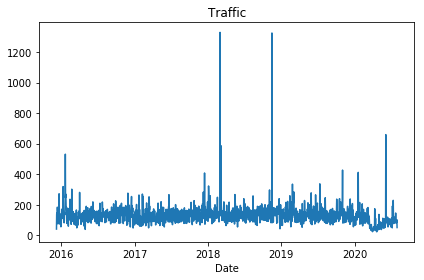

In [80]:
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

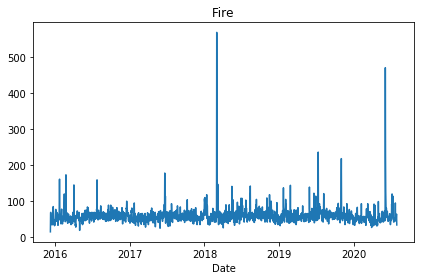

In [81]:
df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

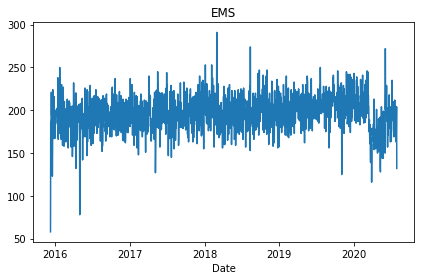

In [82]:
df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

In [85]:
DayHour = df.groupby(by=['DayOfWeek','Hour']).count()['Reason'].unstack()

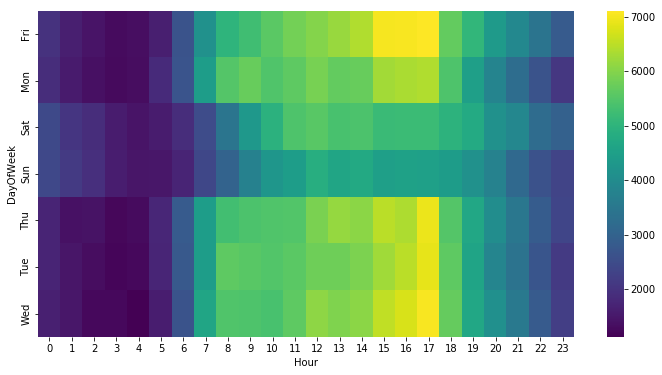

In [89]:
plt.figure(figsize=(12,6))
sns.heatmap(DayHour,cmap = 'viridis')

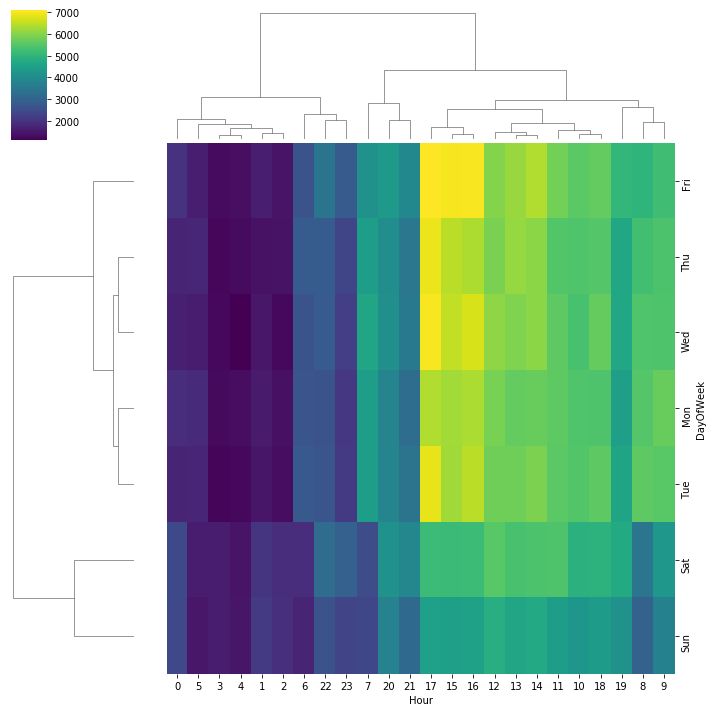

In [88]:
sns.clustermap(DayHour,cmap = 'viridis')

In [90]:
DayMonth = df.groupby(by=['DayOfWeek','Month']).count()['Reason'].unstack()
DayMonth.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
DayOfWeek,,,,,,,,,,,,
Fri,9309,8255,10941,7997,8904,9207,8681,7336,7694,6934,8379,9305
Mon,8896,8747,8060,8410,7881,8511,9499,6854,6598,8075,6722,8492
Sat,8475,7593,8050,7514,7223,8198,7748,6111,6566,6609,6773,8592
Sun,7478,6452,6766,6865,6694,6837,7859,5275,5956,6316,5196,7165
Thu,9055,7997,8849,7722,8740,9489,8378,7508,6954,7482,8358,8151


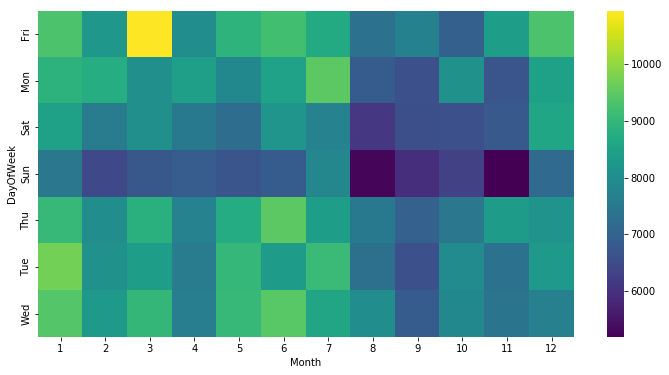

In [91]:
plt.figure(figsize=(12,6))
sns.heatmap(DayMonth,cmap = 'viridis')